**Read Manga Project**

**Students :**
- ANDRIAMAHATANA Tombo H.
- RANDRIAMIARANA Manda Ambinintsoa
- NOMENIAVO Itokiana Hasiniaina

-----

<h1> Read Manga - Panel Detection Model </h1>

-----

<h1> Description </h1>
Developing an AI computer vision model to detect and segment individual panels on manga pages, enabling efficient analysis and processing of manga layouts.

<h1> Model Training : Transfer Learning </h1>

Train directly our model with a pretrained YOLOv10 model, and with our test-dataset.

test-dataset :
- Train : 40 images (Chap.3 : Boruto two blue vortex)
- Validation : 40 images (Chap.2 : Boruto two blue vortex)
- Test : 50 images (Chap.1 : Boruto two blue vortex)

**IMPORTING DATASET**</br>

Download the complet dataset from Google Drive

In [ ]:
# Download the dataset

#!gdown 1fOyDPlMmhPjRhkhmGOhtP-OQimOC-atr -O "dataset.zip"
!gdown 1TFmjN5JwCrat_7uo8b66bbDbzhiARNbZ -O "dataset.zip"

# Unzip the downloaded dataset into the desired directory
!unzip -u dataset.zip -d /content/dataset

Downloading...
From: https://drive.google.com/uc?id=1TFmjN5JwCrat_7uo8b66bbDbzhiARNbZ
To: /content/dataset.zip
100% 22.7M/22.7M [00:01<00:00, 13.7MB/s]
Archive:  dataset.zip
   creating: /content/dataset/dataset/
   creating: /content/dataset/dataset/test/
  inflating: /content/dataset/dataset/test/classes.txt  
   creating: /content/dataset/dataset/test/images/
  inflating: /content/dataset/dataset/test/images/.jpg  
  inflating: /content/dataset/dataset/test/images/Boruto_TBV_101.jpg  
  inflating: /content/dataset/dataset/test/images/Boruto_TBV_102.jpg  
  inflating: /content/dataset/dataset/test/images/Boruto_TBV_103.jpg  
  inflating: /content/dataset/dataset/test/images/Boruto_TBV_104.jpg  
  inflating: /content/dataset/dataset/test/images/Boruto_TBV_105.jpg  
  inflating: /content/dataset/dataset/test/images/Boruto_TBV_106.jpg  
  inflating: /content/dataset/dataset/test/images/Boruto_TBV_107.jpg  
  inflating: /content/dataset/dataset/test/images/Boruto_TBV_108.jpg  
  inflatin

In [ ]:
!mv /content/dataset/dataset/train /content/dataset/
!mv /content/dataset/dataset/test /content/dataset/
!mv /content/dataset/dataset/val /content/dataset/

Importing all python libraries needed

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import imageio

Usefull functions

In [ ]:
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

def load_annotations(label_path):
    if not os.path.exists(label_path):
        return []
    with open(label_path, 'r') as file:
        lines = file.readlines()
    boxes = [list(map(float, line.strip().split())) for line in lines]
    return boxes

def draw_boxes(image, boxes):
    height, width, _ = image.shape
    for box in boxes:
        # Ensure the box has 5 elements (class, x_center, y_center, width, height)
        if len(box) != 5:
            continue
        x_center, y_center, w, h = box[1], box[2], box[3], box[4]
        x1 = int((x_center - w / 2) * width)
        y1 = int((y_center - h / 2) * height)
        x2 = int((x_center + w / 2) * width)
        y2 = int((y_center + h / 2) * height)
        color = (255, 0, 0)
        if box[0] == 1:
          color = (220, 150, 150)
        elif box[0] == 2:
          color = (230, 135, 60)
        elif box[0] == 3:
          color = (210, 150, 50)

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    return image

def get_random_images(images_dir, num_images=10):
    """ Get a list of random image file paths from a directory. """
    image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
    return random.sample(image_files, num_images)

def plot_images(original_images, predicted_images):
    """ Plot original and predicted images side by side. """
    num_images = len(original_images)
    plt.figure(figsize=(20, num_images * 4))

    for i in range(num_images):
        # Plot original image with bounding boxes
        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(original_images[i])
        plt.title(f"Original {i+1}")
        plt.axis('off')

        # Plot predicted image
        plt.subplot(num_images, 2, 2 * i + 2)
        plt.imshow(predicted_images[i])
        plt.title(f"Predicted {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def preview_dataset_images(dataset_name):
  # Define paths
  train_images_path = f'/content/{dataset_name}/train/images'
  train_labels_path = f'/content/{dataset_name}/train/labels'

  # Get list of image filenames
  image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg') or f.endswith('.png')]

  # Select 10 random image files
  random_images = random.sample(image_files, 10)


  # Create a plot with 10 subplots
  fig, axes = plt.subplots(5, 2, figsize=(20, 40))
  axes = axes.flatten()

  for i, img_file in enumerate(random_images):
      img_path = os.path.join(train_images_path, img_file)
      label_path = os.path.join(train_labels_path, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))

      # Load image and annotations
      image = load_image(img_path)
      annotations = load_annotations(label_path)

      # Draw bounding boxes
      image_with_boxes = draw_boxes(image, annotations)

      # Plot image
      axes[i].imshow(image_with_boxes)
      axes[i].axis('off')
      axes[i].set_title(f'Image {i+1}')

  plt.tight_layout()
  plt.show()

Preview Dataset Images

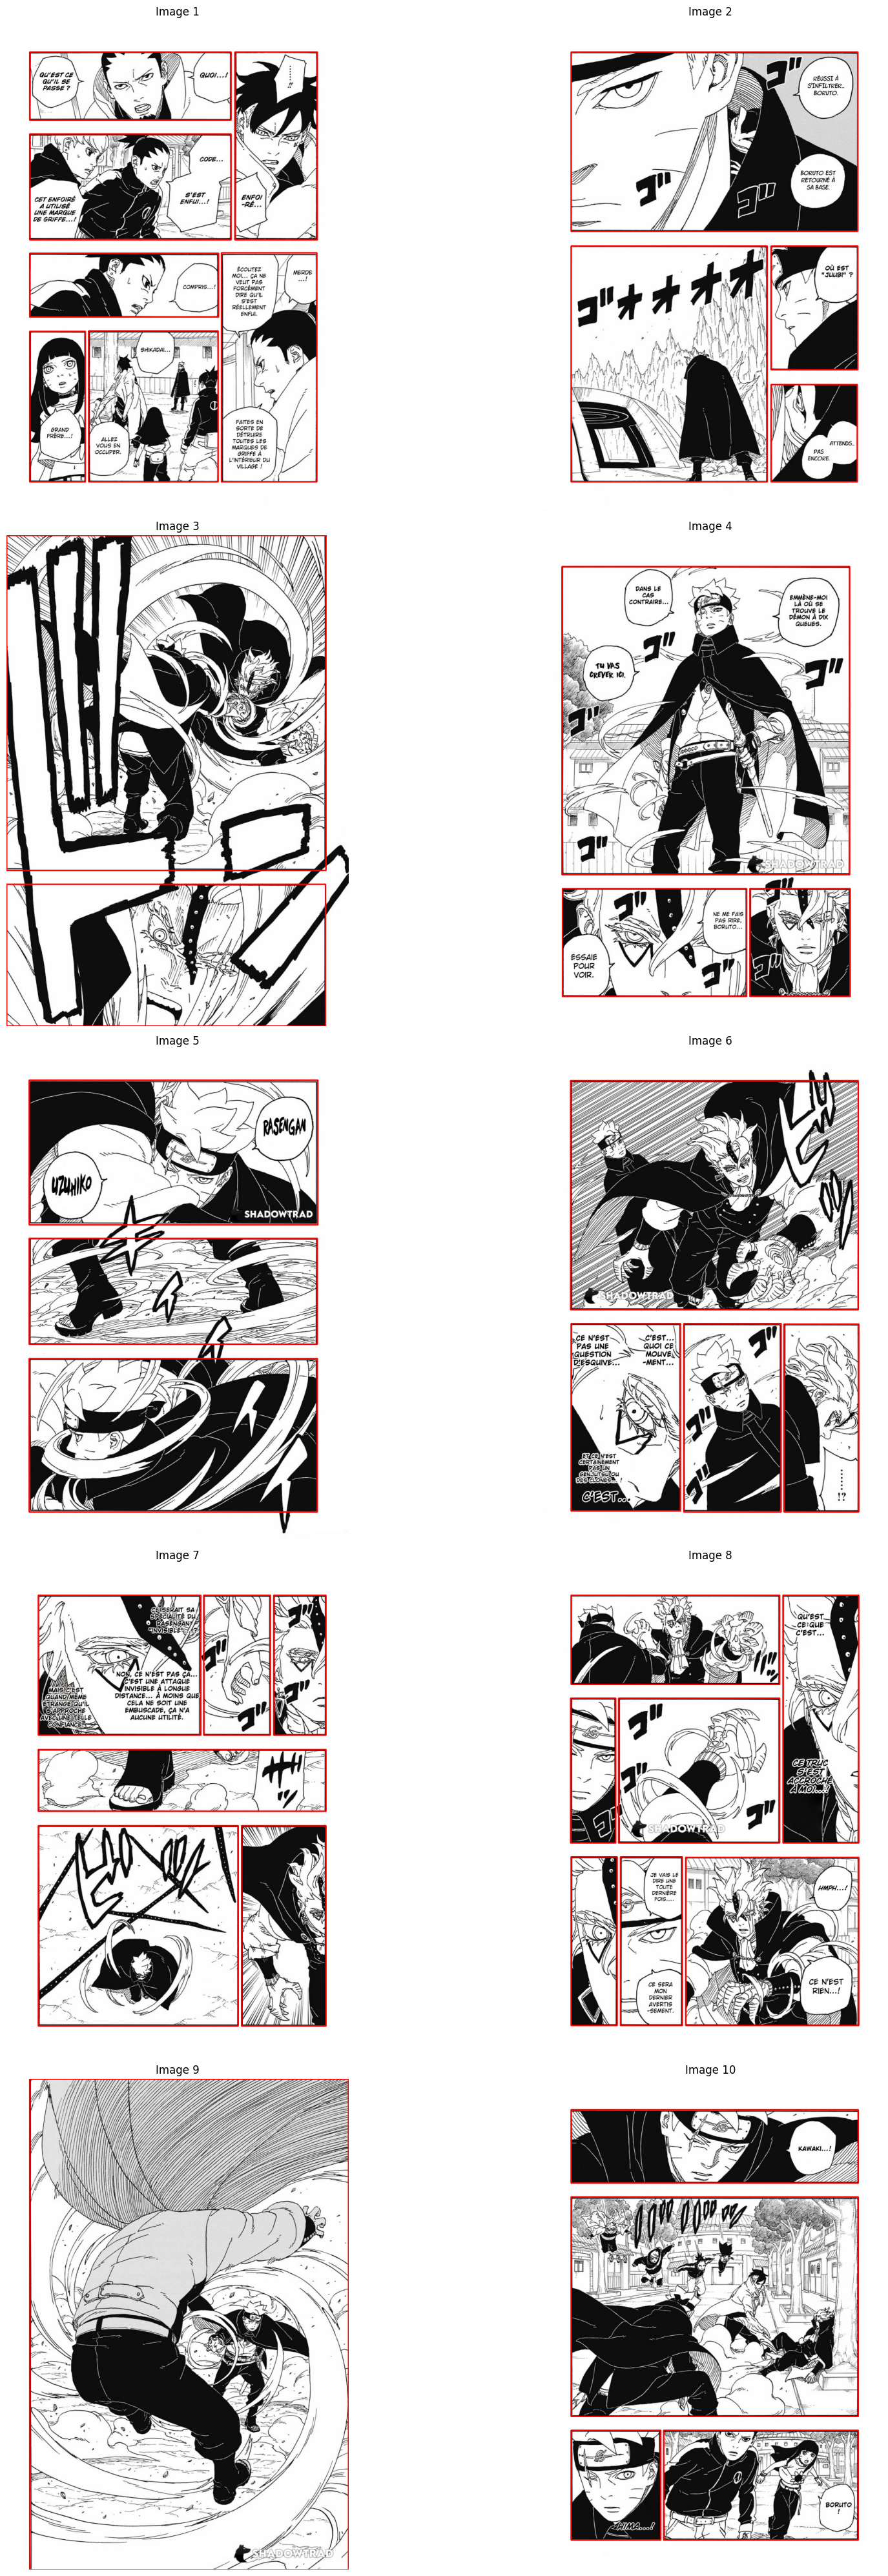

In [ ]:
preview_dataset_images("dataset")

Download YOLOv10 from HuggingFace

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install huggingface_hub

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Download model weights

In [ ]:
!mkdir -p /content/weights
!wget -P /content/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!ls -lh /content/weights

total 123M
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt


- Nano (n): 2.3 million parameters
- Small (s): 7.2 million parameters
- Medium (m): 15.4 million parameters
- Big (b): 19.1 million parameters
- Large (l): 24.4 million parameters
- Extra Large (x): 29.5 million parameters

Modification of YAML file for YOLO models - redefine dataset path

In [ ]:
import yaml

data = {}

# Modify the YAML content
data['train'] = '/content/dataset/train/images'
data['val'] = '/content/dataset/val/images'
data['test'] = '/content/dataset/test/images'
data['nc'] = 1  # Number of classes
data['names'] = ["border"]  # Class names


# Write the modified YAML back to the file
with open('/content/dataset/data.yaml', 'w') as file:
    yaml.safe_dump(data, file)

print("\nYAML file has been created/modified.")


YAML file has been created/modified.


**TRAINING ON YOLO-V10**</br>

 Choosing hyper-parameters :
 - x-large-model = yolov10x (for best results despite the calculation time)
 - epoch = 200 (a considerable number of epochs - not too big not too small)
 - batch = 4

In [ ]:
from ultralytics import settings
settings.update({"wandb": False})

In [ ]:
!yolo task=detect mode=train epochs=200 batch=4 plots=True \
model=/content/weights/yolov10x.pt \
data=/content/dataset/data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

**Exécution time :** 0.512 hours </br>

**Performance :**
- mAP : </br>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):
                   all         39        149      0.966      0.963      0.991      0.961
Interpretation :

Overall performance is already high with a precision in classification of 0.966, and a precision of bounding box localization of
0.991 (we take into account the mAP50 in our case because we do not need strict localization of details).

- Confusion matrix :

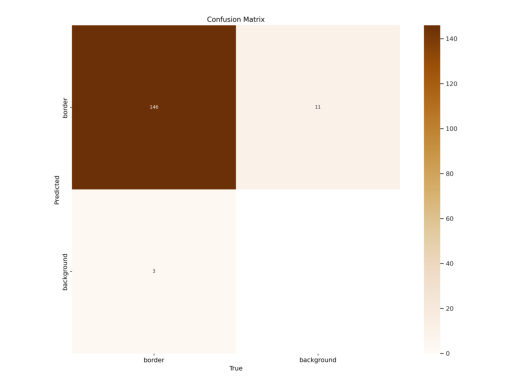

In [ ]:
confusion_matrix_01 = cv2.imread('/content/runs/detect/train2/confusion_matrix.png',cv2.IMREAD_COLOR)
plt.imshow(confusion_matrix_01)
plt.axis("off")
plt.show()

Interpretation : </br>
...

- F1-score curve :

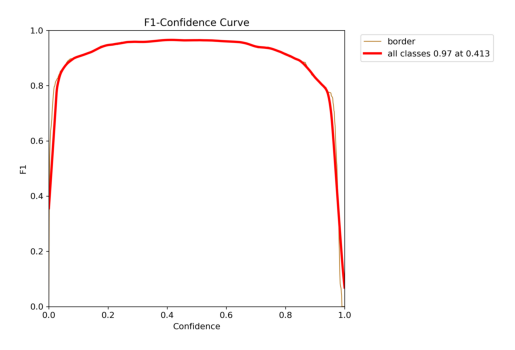

In [ ]:
f1_score_01 = cv2.imread('/content/runs/detect/train2/F1_curve.png',cv2.IMREAD_COLOR)
plt.imshow(f1_score_01)
plt.axis("off")
plt.show()

Interpretation: </br>
The overall curve seems to look good as a square.

**INFERENCE** </br>

Baseline model

In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True show_labels=True \
model=/content/runs/detect/train2/weights/best.pt \
source=/content/dataset/val/images

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

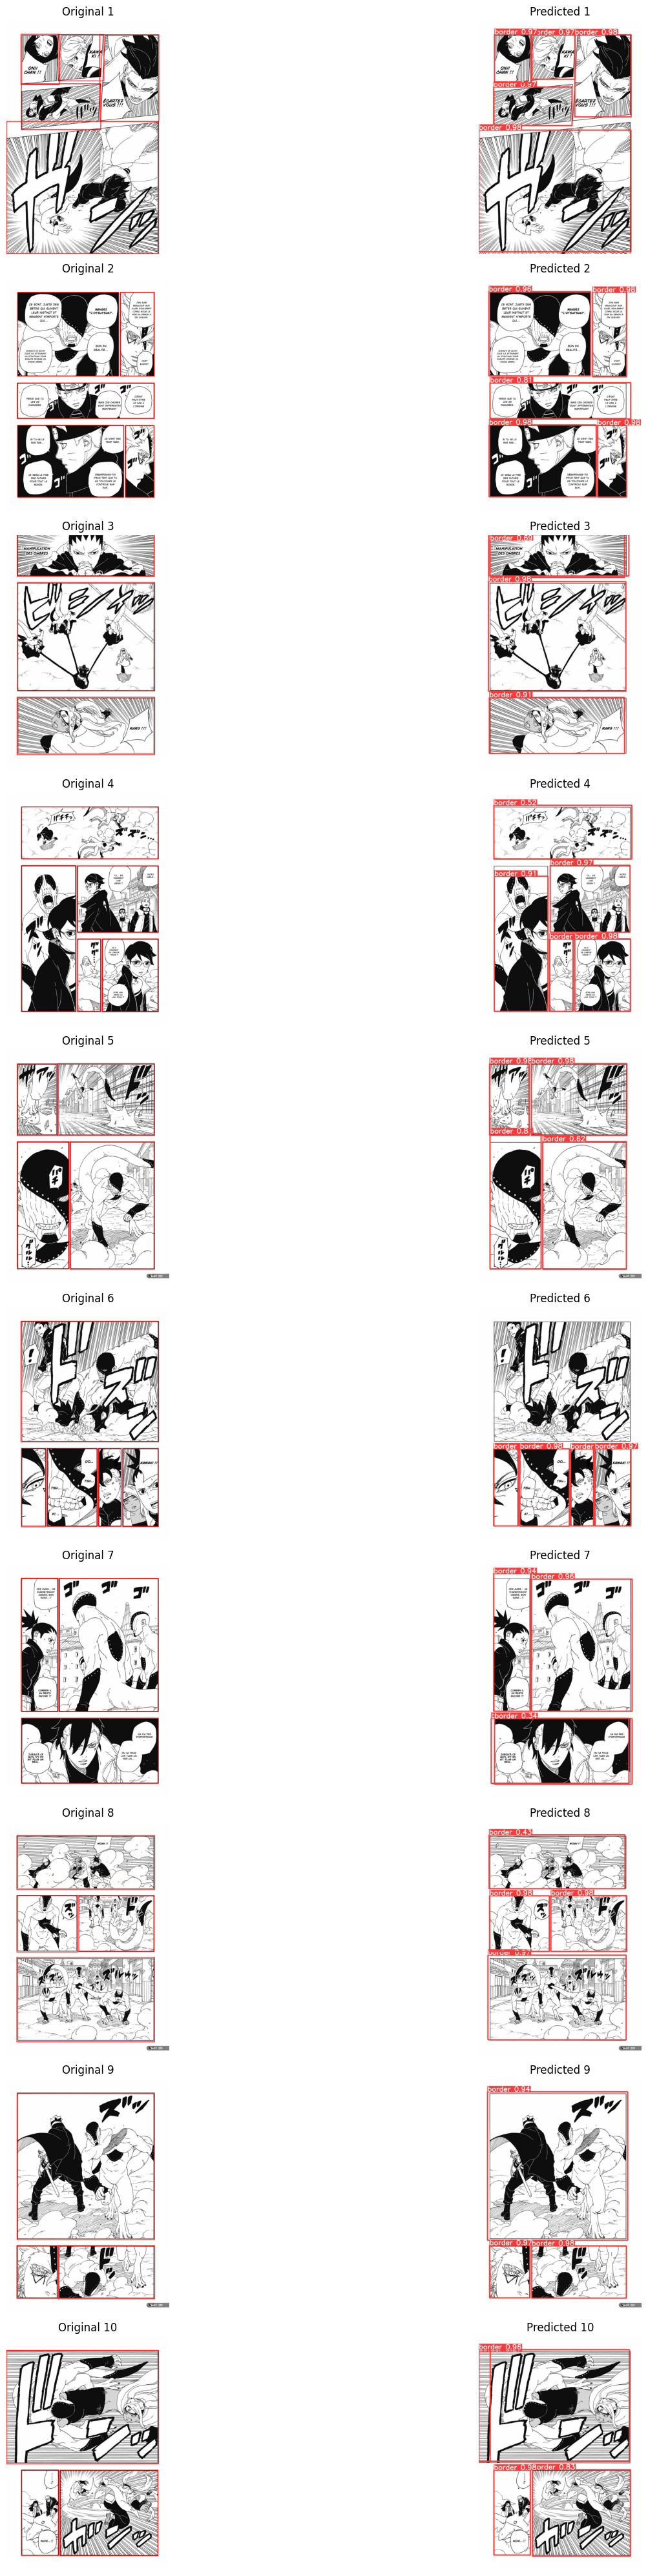

In [ ]:
# Define directories
original_images_dir = '/content/dataset/val/images'
predicted_images_dir = '/content/runs/detect/predict'
annotations_dir = '/content/dataset/val/labels'

# Get random images
random_image_files = get_random_images(original_images_dir, num_images=10)

# Load images and annotations
original_images = []
predicted_images = []
for image_file in random_image_files:
    # Load and annotate original image
    image_path = os.path.join(original_images_dir, image_file)
    annotation_path = os.path.join(annotations_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))
    image = load_image(image_path)
    boxes = load_annotations(annotation_path)
    draw_boxes(image, boxes)
    original_images.append(image)

    # Load predicted image
    predicted_image_path = os.path.join(predicted_images_dir, image_file)
    predicted_image = load_image(predicted_image_path)
    predicted_images.append(predicted_image)

# Plot images side by side
plot_images(original_images, predicted_images)

**Observation :** </br>
We have a fairly good model with an F1-score of 0.97 at a confidence threshold of 0.413, achieved using 40 training images.

-----

**HYPER-PARAMETERS**</br>

 Choosing hyper-parameters :
 - close_mosaic (disable mosaic feature)
 - translate (avoid translating images)
 - scale (avoid scaling images)
 - mosaic (avoid mixing four images into one)

In [ ]:
!yolo task=detect mode=train epochs=300 batch=9 plots=True close_mosaic=0 translate=0.0 scale=0.0 mosaic=0 \
model=/content/weights/yolov10x.pt \
data=/content/dataset/data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

**Exécution time :** 0.752 hours </br>

**Performance :**
- mAP : </br>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):
                   all         39        149      0.982      0.826      0.959      0.843
Interpretation :
the last model was better than this one.
